✅ Loaded benin data with shape (525600, 21)
✅ Loaded sierraleone-bumbuna data with shape (525600, 21)
✅ Loaded togo-dapaong_qc data with shape (525600, 21)


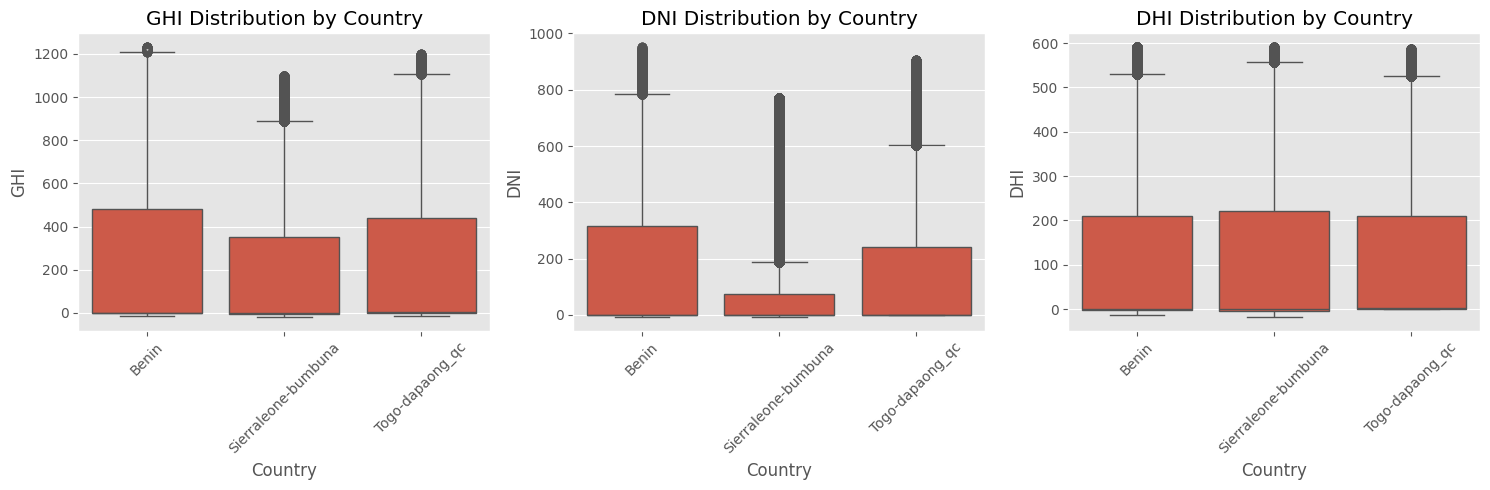

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.342811,1.8,330.868308,167.187516,-0.1,261.710501,110.906983,1.6,152.916844
1,Sierraleone-bumbuna,196.441990,0.3,291.235290,104.527217,-0.1,201.696328,110.109541,-0.1,154.170508
2,Togo-dapaong_qc,229.831936,2.1,321.643747,149.368966,0.0,248.554496,112.408673,2.5,151.292938



Statistical Tests (Kruskal-Wallis):
GHI:
H-statistic: 5142.45
p-value: 0.0000

DNI:
H-statistic: 97689.83
p-value: 0.0000

DHI:
H-statistic: 66883.04
p-value: 0.0000




### Key Findings

- Benin shows the highest mean GHI (240.34 W/m²) and DNI (167.19 W/m²), but also exhibits the greatest variability (GHI std: 330.87, DNI std: 261.71).
- Statistical tests reveal significant differences in solar radiation patterns across countries with all metrics showing p-values < 0.0001, indicating strong evidence of regional variation.
- Sierra Leone-Bumbuna demonstrates the most consistent solar radiation profile with the lowest standard deviation in GHI (291.24) and DNI (201.70), though with lower overall means (GHI: 196.44, DNI: 104.53).


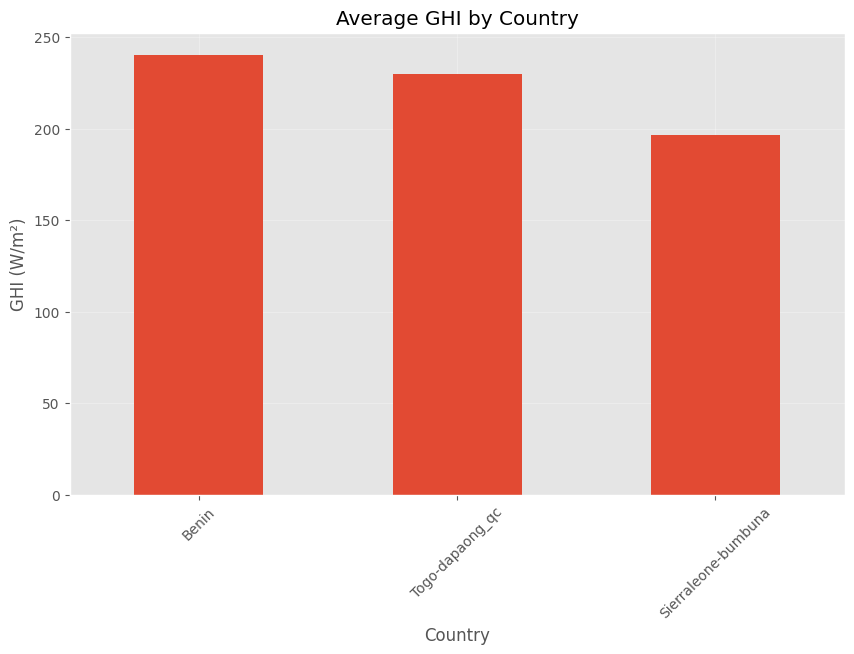

In [4]:
"""
CROSS-COUNTRY SOLAR POTENTIAL COMPARISON
Compares solar radiation metrics across Benin, Sierra Leone, and Togo
"""

# ======================
# 1. SETUP AND IMPORTS
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, Markdown

# Visualization settings
plt.style.use('ggplot')
%matplotlib inline

# ======================
# 2. DATA LOADING
# ======================
# Load cleaned datasets
countries = ['benin', 'sierraleone-bumbuna', 'togo-dapaong_qc']
dfs = {}

for country in countries:
    try:
        df = pd.read_csv(f'../../data/{country}_clean.csv')
        df['Country'] = country.capitalize()  # Add country column
        dfs[country] = df
        print(f"✅ Loaded {country} data with shape {df.shape}")
    except FileNotFoundError:
        print(f"❌ Error: {country}_clean.csv not found")

# Combine all dataframes
df_combined = pd.concat(dfs.values(), ignore_index=True)

# ======================
# 3. METRIC COMPARISON
# ======================
# Define metrics to compare
metrics = ['GHI', 'DNI', 'DHI']

# Create boxplots for each metric
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df_combined, x='Country', y=metric)
    plt.title(f'{metric} Distribution by Country')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create summary statistics table
summary_stats = []
for country in countries:
    country_stats = {}
    country_stats['Country'] = country.capitalize()
    
    for metric in metrics:
        data = dfs[country][metric]
        country_stats[f'{metric}_mean'] = data.mean()
        country_stats[f'{metric}_median'] = data.median()
        country_stats[f'{metric}_std'] = data.std()
    
    summary_stats.append(country_stats)

summary_df = pd.DataFrame(summary_stats)
display(summary_df)

# ======================
# 4. STATISTICAL TESTING
# ======================
# Perform Kruskal-Wallis H-test for each metric
print("\nStatistical Tests (Kruskal-Wallis):")
for metric in metrics:
    groups = [df[metric] for df in dfs.values()]
    h_stat, p_val = stats.kruskal(*groups)
    print(f"{metric}:")
    print(f"H-statistic: {h_stat:.2f}")
    print(f"p-value: {p_val:.4f}\n")

# ======================
# 5. KEY OBSERVATIONS
# ======================
# Define the key findings
key_findings = """
### Key Findings

- Benin shows the highest mean GHI (240.34 W/m²) and DNI (167.19 W/m²), but also exhibits the greatest variability (GHI std: 330.87, DNI std: 261.71).
- Statistical tests reveal significant differences in solar radiation patterns across countries with all metrics showing p-values < 0.0001, indicating strong evidence of regional variation.
- Sierra Leone-Bumbuna demonstrates the most consistent solar radiation profile with the lowest standard deviation in GHI (291.24) and DNI (201.70), though with lower overall means (GHI: 196.44, DNI: 104.53).
"""

# Display the markdown
display(Markdown(key_findings))

# ======================
# 6. VISUAL SUMMARY
# ======================
# Create bar chart of average GHI by country
plt.figure(figsize=(10, 6))
avg_ghi = df_combined.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar')
plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()